In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='darkgrid')


In [2]:
car_data = pd.read_csv("C:/Projects/learning/datasets/pl-foundations-statistics-probability-machine-learning/CarPrice_Assignment.csv")
car_data.head()         

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Text(0.5, 1.0, 'Curbweight vs Price')

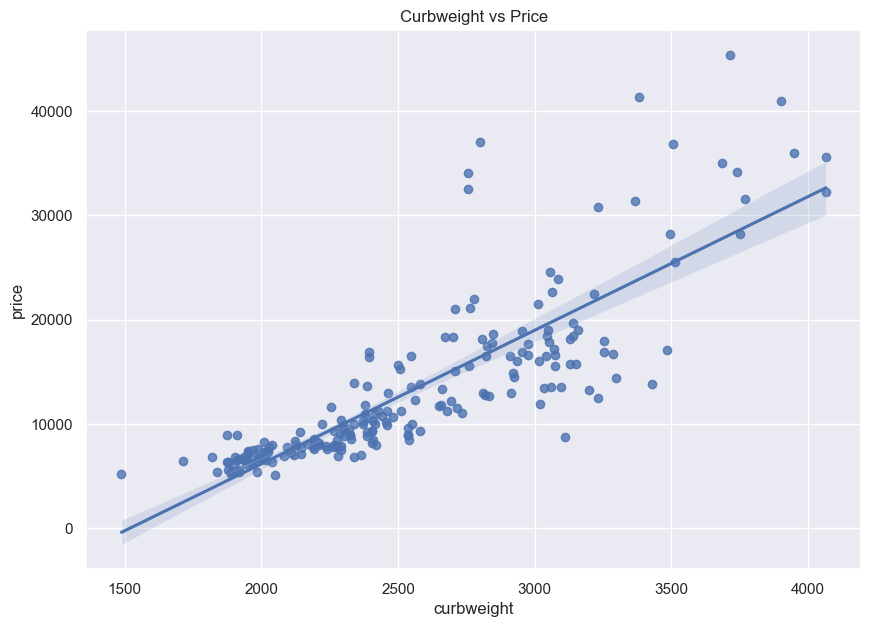

In [3]:
plt.figure(figsize=(10,7))
sns.regplot(data=car_data, x='curbweight', y='price')
plt.title('Curbweight vs Price')

Text(0.5, 1.0, 'Car Body vs Price')

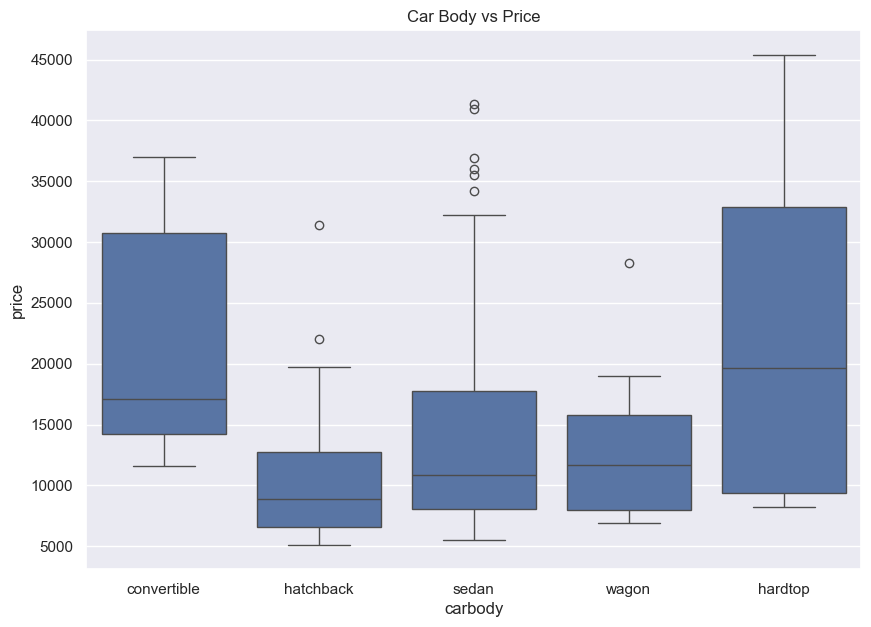

In [4]:
plt.figure(figsize=(10,7))
sns.boxplot(data=car_data, x='carbody', y='price')
plt.title('Car Body vs Price')

In [5]:
data_corr = car_data[['enginesize', 'boreratio', 'stroke', 'compressionratio',
                      'peakrpm', 'citympg', 'highwaympg', 'price']].corr()

data_corr

,enginesize,boreratio,stroke,compressionratio,peakrpm,citympg,highwaympg,price
enginesize,1.000000,0.583774,0.203129,0.028971,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.583774,1.000000,-0.055909,0.005197,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.203129,-0.055909,1.000000,0.186110,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.028971,0.005197,0.186110,1.000000,-0.435741,0.324701,0.265201,0.067984
peakrpm,-0.244660,-0.254976,-0.067964,-0.435741,1.000000,-0.113544,-0.054275,-0.085267
citympg,-0.653658,-0.584532,-0.042145,0.324701,-0.113544,1.000000,0.971337,-0.685751
highwaympg,-0.677470,-0.587012,-0.043931,0.265201,-0.054275,0.971337,1.000000,-0.697599
price,0.874145,0.553173,0.079443,0.067984,-0.085267,-0.685751,-0.697599,1.000000


Text(0.5, 1.0, 'Correlations')

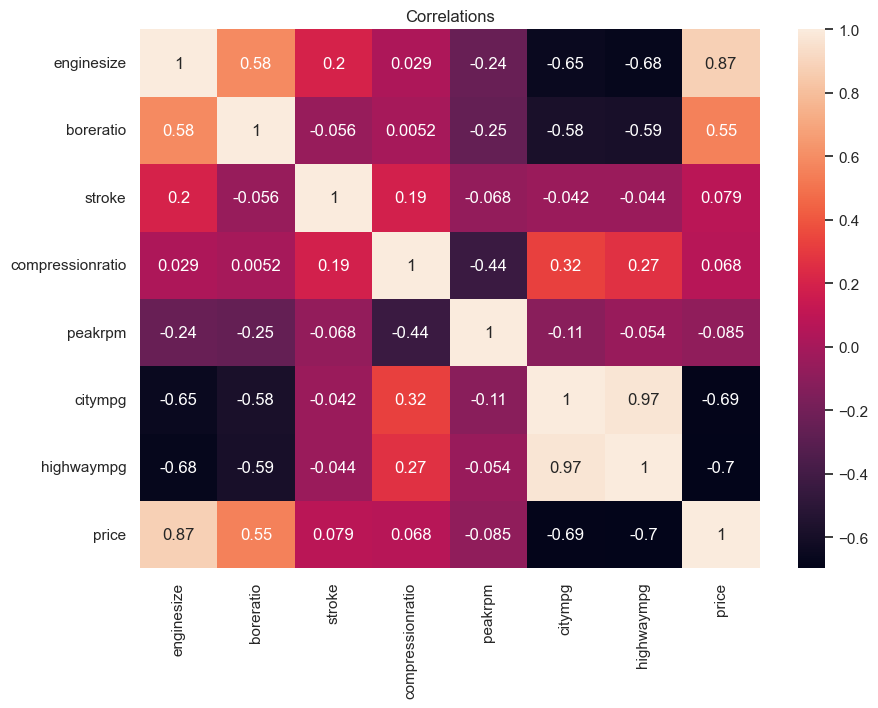

In [6]:
plt.figure(figsize=(10,7))
sns.heatmap(data=data_corr, annot=True)
plt.title('Correlations')

In [7]:
cols = ['aspiration', 'doornumber', 'enginelocation', 'fueltype']
car_data[cols].sample(10)

,aspiration,doornumber,enginelocation,fueltype
46,std,two,front,gas
79,turbo,two,front,gas
19,std,two,front,gas
22,std,two,front,gas
100,std,four,front,gas
131,std,two,front,gas
83,turbo,two,front,gas
88,std,four,front,gas
181,std,four,front,gas
111,std,four,front,gas


In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cols:
    car_data[col] = le.fit_transform(car_data[col])

In [9]:
car_data[cols].sample(10)

,aspiration,doornumber,enginelocation,fueltype
43,0,0,0,1
16,0,1,0,1
7,0,0,0,1
170,0,1,0,1
15,0,0,0,1
184,0,0,0,0
35,0,0,0,1
69,1,1,0,0
32,0,1,0,1
194,0,0,0,1


In [10]:
car_data = car_data.drop(columns=['CarName', 'car_ID'])
car_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,0,1,convertible,rwd,0,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,1,convertible,rwd,0,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,1,hatchback,rwd,0,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,0,0,sedan,fwd,0,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,0,0,sedan,4wd,0,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
# categorical columns
cat_columns = ['carbody', 'enginetype', 'drivewheel', 'cylindernumber', 'fuelsystem']

for col in cat_columns:
    car_data = pd.concat([car_data.drop(col, axis = 1), pd.get_dummies(car_data[col], dtype=int, prefix = col, prefix_sep = '_', drop_first=True)], axis=1)

In [12]:
car_data.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
1,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
2,1,1,0,1,0,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,1,0,0
3,2,1,0,0,0,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,1,0,0
4,2,1,0,0,0,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,1,0,0


In [13]:
car_data = car_data.sample(frac=1).reset_index(drop=True)

In [15]:
## preprocessing is now complete

In [16]:
X = car_data.drop(['price'], axis=1)
y = car_data['price']

In [17]:
# add a constant for the y-intercept
import statsmodels.api as sm
X = sm.add_constant(X)
X.head()

,const,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1.0,0,1,0,0,0,114.2,198.9,68.4,58.7,...,0,0,0,0,0,0,0,1,0,0
1,1.0,0,1,0,0,0,95.7,169.7,63.6,59.1,...,0,0,0,1,0,0,0,0,0,0
2,1.0,2,1,0,1,0,98.4,176.2,65.6,52.0,...,0,0,0,0,0,0,0,1,0,0
3,1.0,2,1,0,1,0,98.4,176.2,65.6,52.0,...,0,0,0,0,0,0,0,1,0,0
4,1.0,0,0,1,0,0,100.4,180.2,66.9,55.1,...,0,0,0,0,0,1,0,0,0,0


In [18]:
# perform data split
train_size = int(0.8 * len(X))

X_train_set = X[:train_size]
y_train_set = y[:train_size]

X_test_set = X[train_size:]
y_test_set = y[train_size:]


In [19]:
X_train_set.shape, X_test_set.shape

((164, 44), (41, 44))

In [21]:
y_train_set.shape, y_test_set.shape

((164,), (41,))

In [22]:
model = sm.OLS(y_train_set, X_train_set).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     60.02
Date:                Sat, 02 Aug 2025   Prob (F-statistic):           1.04e-63
Time:                        03:14:34   Log-Likelihood:                -1457.6
No. Observations:                 164   AIC:                             2997.
Df Residuals:                     123   BIC:                             3124.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.172e+04   1.02e+04     -2.129      0.035   -4.19e+04   -1521.322
symboling               348.9573    251.739      1.386      0.168    -149.345     847.259
fueltype               -1.57e+04   5487.158     -2.861      0.005   -2.66e+04   -4839.476
aspiration             2090.5962    906.364      2.307      0.023     296.503    3884.689
doornumber             -175.3811    633.933     -0.277      0.783   -1430.214    1079.451
enginelocation         9653.1875   2706.895      3.566      0.001    4295.055     1.5e+04
wheelbase                61.6767     99.022      0.623      0.535    -134.330     257.684
carlength               -47.2579     53.196     -0.888      0.376    -152.556      58.040
carwidth                802.7673    233.584      3.437      0.001     340.402    1265.133
carheight               134.4024    133.226      1.009      0.315    -129.310     398.115
curbweight                3.1686      1.716      1.846      0.067      -0.229       6.566
enginesize              168.1216     31.699      5.304      0.000     105.375     230.868
boreratio             -6563.9805   2317.535     -2.832      0.005   -1.12e+04   -1976.562
stroke                -5588.9879   1114.628     -5.014      0.000   -7795.325   -3382.651
compressionratio       -650.8398    538.781     -1.208      0.229   -1717.323     415.643
horsepower               -0.0370     22.066     -0.002      0.999     -43.715      43.641
peakrpm                   1.9373      0.646      2.999      0.003       0.659       3.216
citympg                -245.3542    157.130     -1.561      0.121    -556.383      65.674
highwaympg              229.3989    154.734      1.483      0.141     -76.888     535.686
carbody_hardtop       -3410.1367   1369.996     -2.489      0.014   -6121.960    -698.314
carbody_hatchback     -2368.9707   1210.458     -1.957      0.053   -4764.998      27.056
carbody_sedan         -1395.4368   1321.821     -1.056      0.293   -4011.900    1221.027
carbody_wagon         -2621.8328   1449.369     -1.809      0.073   -5490.770     247.104
enginetype_dohcv      -1013.2105   4807.754     -0.211      0.833   -1.05e+04    8503.443
enginetype_l          -2520.8960   1662.526     -1.516      0.132   -5811.765     769.973
enginetype_ohc         2113.6749    948.343      2.229      0.028     236.489    3990.861
enginetype_ohcf        1177.6586   1627.635      0.724      0.471   -2044.144    4399.462
enginetype_ohcv       -4917.6861   1299.585     -3.784      0.000   -7490.134   -2345.238
enginetype_rotor       2175.1712   1832.273      1.187      0.237   -1451.701    5802.043
drivewheel_fwd           57.3295   1020.720      0.056      0.955   -1963.122    2077.781
drivewheel_rwd         1363.3549   1248.140      1.092      0.277   -1107.261    3833.971
cylindernumber_five   -

In [23]:
y_pred = model.predict(X_test_set)
y_pred[:5]

164    10465.218864
165    21153.975380
166    10923.929276
167     4767.937623
168     8123.272881
dtype: float64

In [24]:
from sklearn.metrics import r2_score

r2_score(y_test_set, y_pred)

0.8466046480860648

In [26]:
# compare actual value to predicted value

data_actual_pred = pd.DataFrame({'Actual Value': y_test_set.ravel(),
                                 'Predicted Value': y_pred.ravel()})

data_actual_pred[:5]

C:\Users\work\AppData\Local\Temp\ipykernel_19964\790468308.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  data_actual_pred = pd.DataFrame({'Actual Value': y_test_set.ravel(),
C:\Users\work\AppData\Local\Temp\ipykernel_19964\790468308.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  'Predicted Value': y_pred.ravel()})


,Actual Value,Predicted Value
0,11245.0,10465.218864
1,15998.0,21153.975380
2,8495.0,10923.929276
3,8249.0,4767.937623
4,7099.0,8123.272881


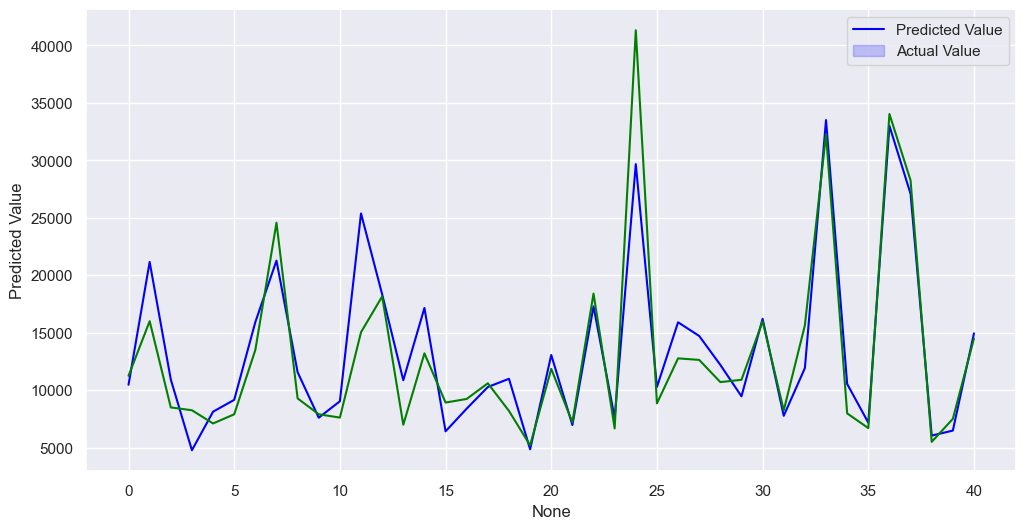

In [27]:
# vizualize the predictions

f, ax = plt.subplots(figsize=(12,6))

sns.lineplot(x = data_actual_pred.index, y='Predicted Value', color='blue', data=data_actual_pred, ax=ax)
sns.lineplot(x = data_actual_pred.index, y='Actual Value', color='green', data=data_actual_pred, ax=ax)

plt.legend(['Predicted Value', 'Actual Value'])